In [11]:
import utils
from global_land_mask import globe
from geopy.distance import geodesic
import numpy as np

In [13]:
import importlib
importlib.reload(utils)

<module 'utils' from '/mnt/h/Documents/fifth_year_shit/math441/project/utils.py'>

# Straight line model

Consider any point that is on land

108


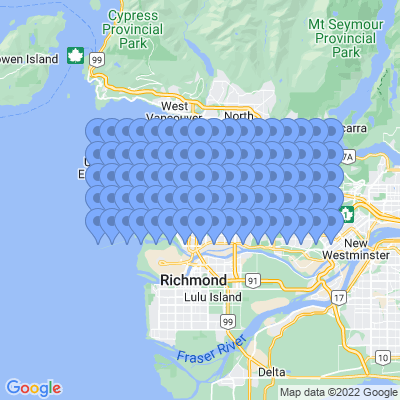

91


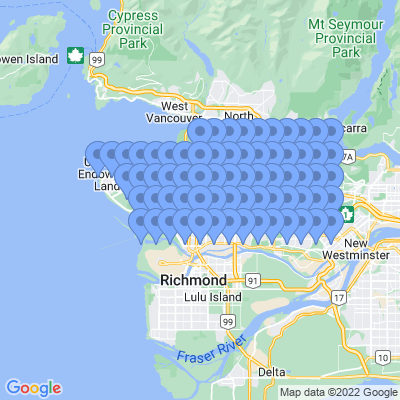

In [18]:
test_problem_center = (49.249828, -123.125774)
test_problem_top_left = (49.295863, -123.270310)
# test_problem_bottom_right = (49.196127, -123.021401)
test_problem_bottom_right = (49.119850, -122.799905)
test_problem_points = utils.equidistant_points(test_problem_center, test_problem_top_left, test_problem_bottom_right, height=6, width=20, unit=0.02)
print(len(test_problem_points))
display(utils.get_map(test_problem_center, markers=[("blue", test_problem_points)], zoom=10))
test_problem_points = list(filter(lambda p: globe.is_land(p[0], p[1]), test_problem_points))
print(len(test_problem_points))
display(utils.get_map(test_problem_center, markers=[("blue", test_problem_points)], zoom=10))

A point covers another point if the distance between them is less than 3 km

In [5]:
def make_set_covering_problem_straight_line(positions):
    positions = [str(lat) + "," + str(long) for lat,long in positions]
    print(f"Creating set covering matrix (n = {len(positions)}) (straight line distances)")
    covering_matrix = np.array([])
    for start in positions:
        # we can only have at most 25 destination, so we have to do this
        covered = []
        for other in positions:
            if geodesic(start, other).kilometers < 3.0:
                covered.append(1)
            else:
                covered.append(0)
        covering_matrix = np.hstack((covering_matrix, covered))
    return covering_matrix.reshape(len(positions), len(positions))

In [19]:
solution = utils.linprog_solver(test_problem_points, make_set_covering_problem_straight_line(test_problem_points))

Creating set covering matrix (n = 91) (straight line distances)


In [20]:
print(f"Locations used: {len(solution)}")

Locations used: 5


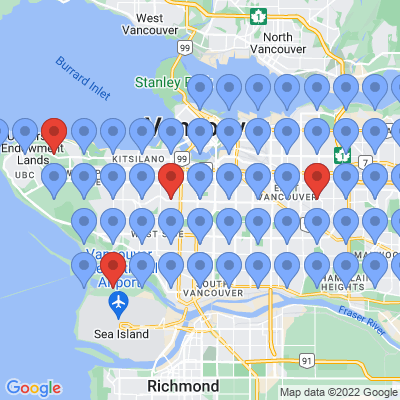

In [21]:
utils.display_solution(test_problem_center, test_problem_points, solution, show_coverage=False)

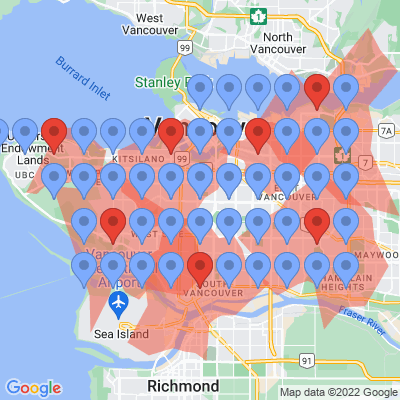

In [17]:
utils.display_solution(test_problem_center, test_problem_points, solution, show_coverage=True)